## **Библиотеки, функции, загрузка файла**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib as mpl
from scipy import stats

Функции   

In [2]:
def rename_columns(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

Загрузка файла  

In [3]:
file_id = '1ATASmLwbd-sVPOJ7kChU9fumc15lRvwK'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
df = pd.read_csv(download_url)

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


## **Общая информация о данных**

Датасет **Superstore Marketing Campaign Dataset** содержит 2240 записей и 22 столбца.

Данные включают числовые и категориальные переменные.

**Основные переменные:**

* **Id** – идентификатор клиента.
* **Year_Birth** – год рождения.
* **Education** – уровень образования.
* **Marital_Status** – семейное положение.
* **Income** – доход.
* **Kidhome, Teenhome** – количество детей разного возраста.
* **Dt_Customer** – дата регистрации.
* **Recency** – число дней с момента последней покупки.
* **MntWines, MntFruits, MntMeatProducts, ...**– сумма покупок в разных категориях товаров.
* **NumDealsPurchases, NumWebPurchases, ...** – количество покупок по различным каналам.
* **Response** – целевая переменная (отклик на маркетинговую кампанию).
* **Complain** – наличие жалоб от клиента.

**3 категориальных признака (object):** Education, Marital_Status, Dt_Customer.

**1 признак с числовым непрерывным (вещественным) типом (float64):** Income.

Остальные **18 признаков - дискретные, целые числа (int64) .**

Данные содержат идентификатор (Id), информацию о пользователях (Year_Birth, Education, Marital_Status, Income и др.), информацию о покупательской активности (MntWines, NumWebPurchases и др.).  

In [4]:
df.shape

(2240, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


**Усредненный портрет покупателя в выборке:**
* Родился примерно в 1970 году, **возраст** - примерно **54 года**
* **Доход - около 52.000 у.е**, но высокое стандартное отклонение по выборке
* **Чаще делает покупки в оффлайн-магазине**, но иногда пользуется каталогом и сайтом для покупок
* В среднем **последняя покупка была совершена 49 дней назад**, но слишком большой разброс в данных (СКО равняется 29)
* **Наибольшая средняя сумма**, потраченная на покупки, находится в категории - **Вина**
* **Только 15%** покупателей в выборке **откликнулось на маркетинговую кампанию**
* **Жалобы редкость - менее 1%** покупателей подавали жалобы

**На что стоит обратить внимание?**
* **Родившиеся в 1893 году** - скорее всего есть выбросы в дате рождения, так как на данный момент им было бы 130 лет
* **Сверхвысокий доход указывает на возможную ошибку занесения данных** (666.666 у.е.), если бы это был ручной ввод респондентом


## **Классификация признаков по типам данных**  

In [7]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [8]:
data_types = df.dtypes

type_counts = data_types.value_counts()

type_info = pd.DataFrame({
    'Type': data_types,
    'Count': [1] * len(data_types)
}).groupby('Type').count()

type_info['Features'] = data_types.groupby(data_types).apply(lambda x: list(x.index))
type_info = type_info.reset_index()

print(type_info)

      Type  Count                                           Features
0    int64     18  [Id, Year_Birth, Kidhome, Teenhome, Recency, M...
1  float64      1                                           [Income]
2   object      3           [Education, Marital_Status, Dt_Customer]


##**Осуществим преобразование столбца Dt_Customer в дату**   


In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [10]:
# Осуществим преобразование столбцов Education Marital_Status в дамми переменные
# df = pd.get_dummies(df, columns=["Education", "Marital_Status"])

In [11]:
df['Total_Spending'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)
df['Total_Spending_Bins'] = pd.cut(
    df['Total_Spending'],
    bins=[0, 500, 1000, 2000, 3000],
    labels=['0-500', '501-1000', '1001-2000', '>2000']
)

In [12]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spending,Total_Spending_Bins
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,1190,1001-2000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,577,501-1000
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,251,0-500
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,11,0-500
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,91,0-500


##**Проверка наличия пропущенных значений**

In [13]:
print("\nОбщее количество пропусков в датасете:", df.isnull().sum().sum())

# Подсчет пропусков в каждом столбце
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  #только столбцы с пропусками
print("\nКоличество пропусков в столбцах:")
print(missing_values)

# Процент пропусков
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]  #только столбцы с пропусками
print("\nПроцент пропусков в столбцах:")
print(missing_percent)


Общее количество пропусков в датасете: 24

Количество пропусков в столбцах:
Income    24
dtype: int64

Процент пропусков в столбцах:
Income    1.071429
dtype: float64


In [14]:
# Проверка строк с пропусками
rows_with_nan = df[df.isnull().any(axis=1)]

print("\nСтроки с пропусками:")
for index, row in rows_with_nan.iterrows():
    nan_columns = row.index[row.isnull()].tolist()  # Список колонок с NaN
    print(f"Индекс {index}: пропуски в колонках {', '.join(nan_columns)}")


Строки с пропусками:
Индекс 134: пропуски в колонках Income
Индекс 262: пропуски в колонках Income
Индекс 394: пропуски в колонках Income
Индекс 449: пропуски в колонках Income
Индекс 525: пропуски в колонках Income
Индекс 590: пропуски в колонках Income
Индекс 899: пропуски в колонках Income
Индекс 997: пропуски в колонках Income
Индекс 1096: пропуски в колонках Income
Индекс 1185: пропуски в колонках Income
Индекс 1213: пропуски в колонках Income
Индекс 1312: пропуски в колонках Income
Индекс 1515: пропуски в колонках Income
Индекс 1558: пропуски в колонках Income
Индекс 1693: пропуски в колонках Income
Индекс 1804: пропуски в колонках Income
Индекс 1858: пропуски в колонках Income
Индекс 1863: пропуски в колонках Income
Индекс 1880: пропуски в колонках Income
Индекс 1967: пропуски в колонках Income
Индекс 1983: пропуски в колонках Income
Индекс 2139: пропуски в колонках Income
Индекс 2165: пропуски в колонках Income
Индекс 2170: пропуски в колонках Income


Так как в датасете **всего 24 пропущенных значений и они составляют лишь 1%** от наблюдений, **их удаление** при построении модели **не окажет значительного влияния** на результаты. Поэтому принято решение **удалить данные наблюдения** на следующих этапах анализа без их восстановления.

##**Проверка наличия повторяющихся строк**

In [15]:
df.duplicated().sum()

0

Повторяющихся строк в датасете не обнаружено.

##**Проверка наличия выбросов**

In [16]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Total_Spending', 'Total_Spending_Bins'],
      dtype='object')

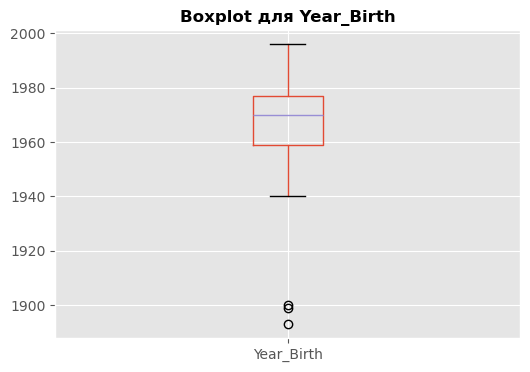

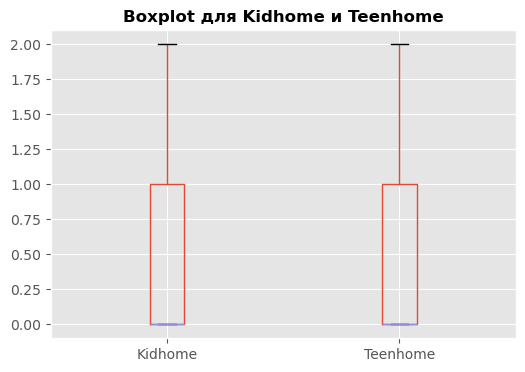

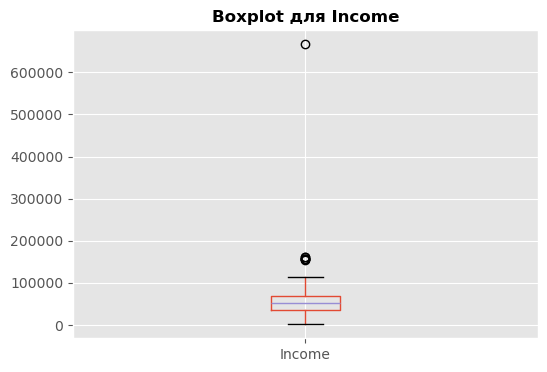

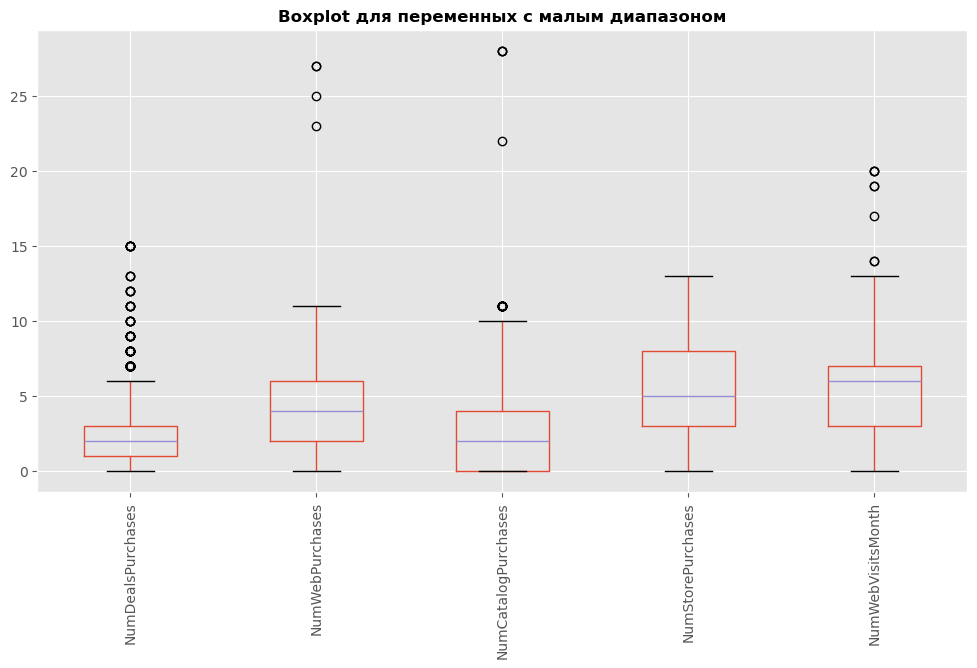

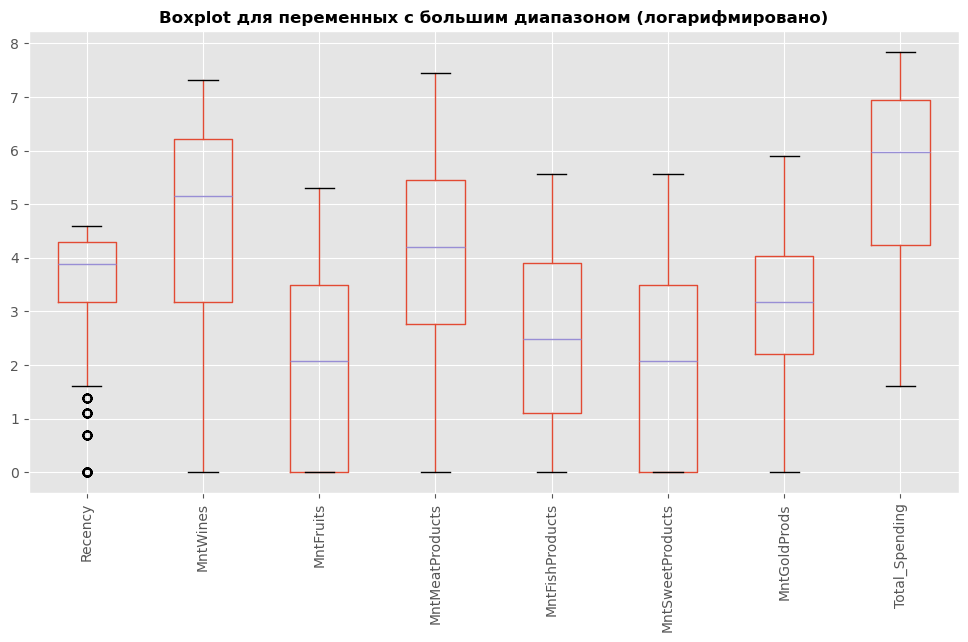

Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
Response               334
Complain                21
Total_Spending           3
dtype: int64

In [17]:
# Исключаем 'Id' из анализа
df_filtered = df.drop(columns=['Id'])

# Числовые переменные
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Выбросы по IQR
Q1 = df_filtered[numeric_columns].quantile(0.25)
Q3 = df_filtered[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) |
                (df_filtered[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

# Разделение переменных
special_columns = ['Response', 'Complain']
year_birth = ['Year_Birth']
kid_teen_columns = ['Kidhome', 'Teenhome']
income_column = ['Income']

# Остальные колонки по масштабу значений
remaining_columns = [col for col in numeric_columns
                     if col not in special_columns + year_birth + kid_teen_columns + income_column]

small_scale = [col for col in remaining_columns if df_filtered[col].max() < 50]
large_scale = [col for col in remaining_columns if df_filtered[col].max() >= 50]

# Логарифмируем переменные с большим диапазоном (обрабатываем только положительные значения)
for col in large_scale:
    df_filtered[col] = df_filtered[col].apply(lambda x: np.log(x) if x > 0 else x)

plt.style.use("ggplot")

# Функция для отрисовки графиков, если в списке есть переменные
def plot_boxplot(columns, title, figsize=(6, 4), rotation=0):
    if columns:
        plt.figure(figsize=figsize)
        df_filtered[columns].boxplot(rot=rotation)
        plt.title(title, fontsize=12, fontweight="bold")
        plt.show()


# Boxplot для Year_Birth
plot_boxplot(year_birth, "Boxplot для Year_Birth")

# Boxplot для Kidhome и Teenhome
plot_boxplot(kid_teen_columns, "Boxplot для Kidhome и Teenhome")

# Boxplot для Income
plot_boxplot(income_column, "Boxplot для Income")

# Boxplot для переменных с малым диапазоном
plot_boxplot(small_scale, "Boxplot для переменных с малым диапазоном", figsize=(12, 6), rotation=90)

# Boxplot для переменных с большим диапазоном
plot_boxplot(large_scale, "Boxplot для переменных с большим диапазоном (логарифмировано)", figsize=(12, 6), rotation=90)

# Вывод количества выбросов
outliers_iqr

**Переменная Дата рождения клиента (Year_Birth):**
* Для переменной **Year_Birth** **характерны экстремальные значения, выходящие за "левый ус" ящика**. Экстремально низкие года рождения для выборки - знак, что это выбросы. Без выбросов распределение было бы похоже на нормальное.

**Переменные детей (Kidhome и Teenhome):**
* при построении boxplot **не было выявлено выбросов** для переменных - **Kidhome, Teenhome**
* **75% клиентов имеют до 1 ребенка малого возраста** (включительно), такая же ситуация и с детьми более взрослого возраст.
* **Медианное значение по выборке - 0 детей** в любом возрасте на клиента. Для переменных детей - **Kidhome, Teenhome** характерна правосторонняя ассиметрия из-за положения медианы в нижней части боксплота.

**Переменная Дохода клиента (Income)**:
* Для переменной **Income** характерно **логнормальное распределение**. Боксплот показывает, что **присутствуют экстремальные значения**, выходящие за предел "правого уса" ящика.

**Переменные с малым диапазоном:**
* при построении boxplot **не было выявлено выбросов** для переменной **NumStorePurchases**.
* Распределение для переменных c малым диапазом начинается от 0, выбросы же характеризуются **экстремальными значениями в правой стороне распределения** - для NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth
* **Для данных переменных характерна правосторонняя ассимметрия** ввиду более длинного "хвоста" распределения.

**Переменные с большим диапазоном:**
* Для переменных с большим диапазоном было **применено логарифмирование**. Это актуально для переменных с более длинным хвостом вправо.
* После логарифмирования почти все переменные приняли распределение **схожее к нормальному распределению**
* **Выбросы** после логарифмирования видны для переменной **Recency**: есть значения за пределами "левого уса".



##**Анализ выбросов с использованием Z-score**
**Трешхолд** для определения выброса - **3 стандартных отклонения**

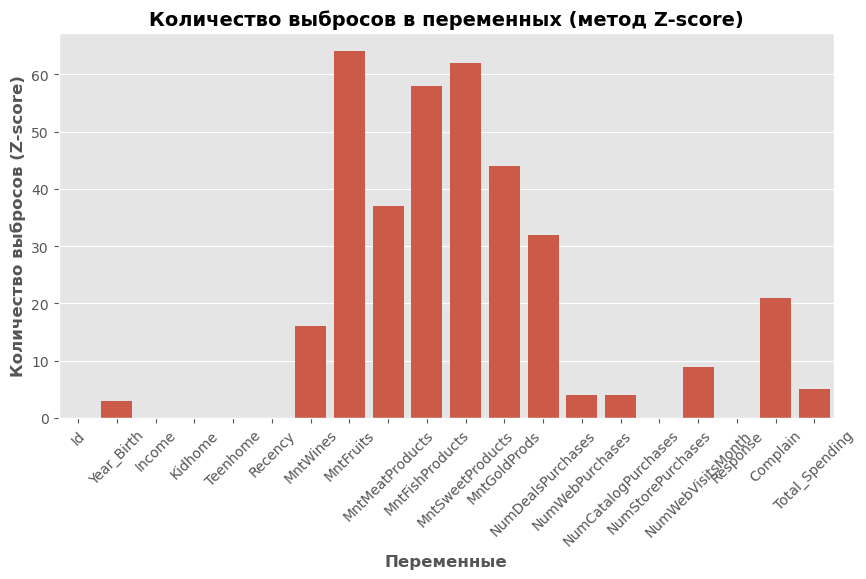

In [18]:
plt.style.use("ggplot")
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
z_outliers = (z_scores > 3) | (z_scores < -3)
z_outlier_counts = z_outliers.sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=z_outlier_counts.index, y=z_outlier_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Переменные", fontsize=12, fontweight="bold")
plt.ylabel("Количество выбросов (Z-score)", fontsize=12, fontweight="bold")
plt.title("Количество выбросов в переменных (метод Z-score)", fontsize=14, fontweight="bold")
plt.show()

Определение выбросов с помощью Z-score показало также, что **преимущественно выбросы выделяются** в переменных, связанных с количеством потраченных **денег на различные категории товаров**.


---


Данный метод, как и boxplot, **не подходит для переменных с ассиметричным распределением**, возможно, поэтому он определил множество значений как выбросы у переменных с ассиметричным (правосторонняя ассиметрия) распределением


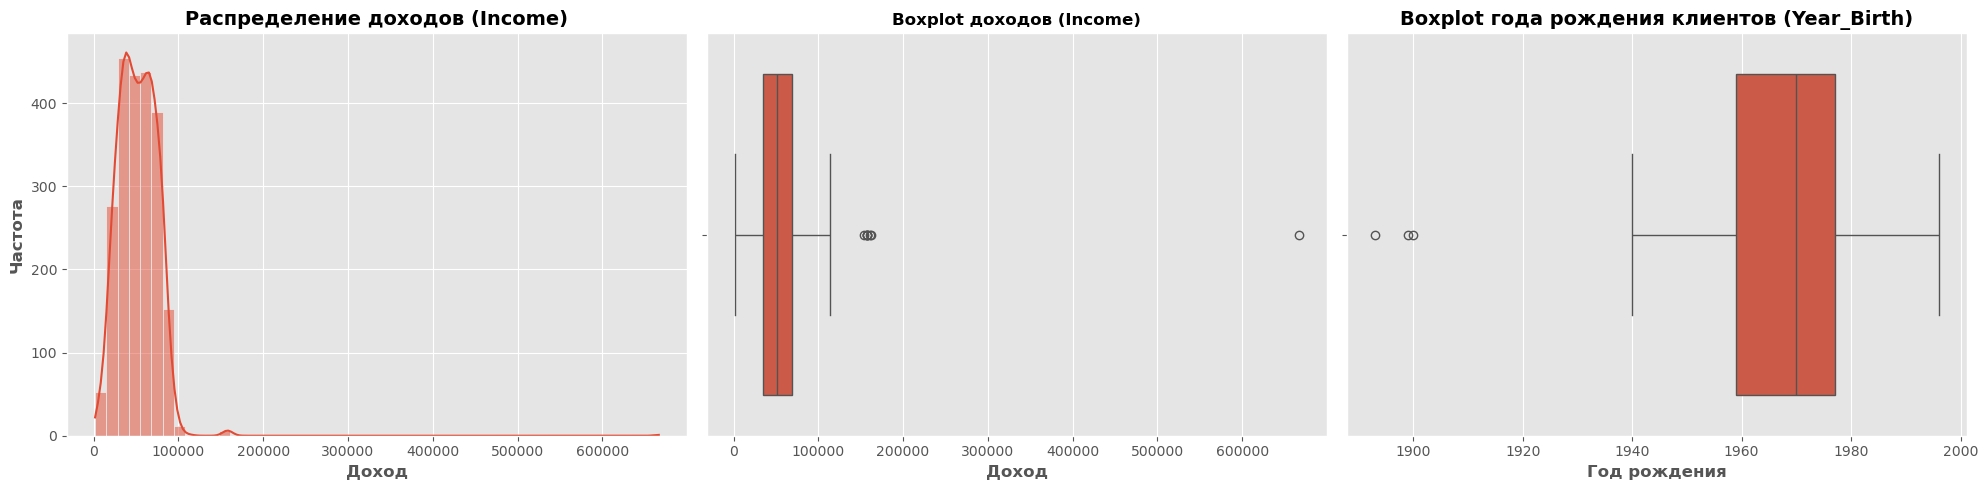

In [19]:
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Гистограмма доходов
sns.histplot(df["Income"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Распределение доходов (Income)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Доход", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Частота", fontsize=12, fontweight="bold")

# Boxplot доходов
sns.boxplot(x=df["Income"].dropna(), ax=axes[1])
axes[1].set_title("Boxplot доходов (Income)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Доход", fontsize=12, fontweight="bold")

# Boxplot года рождения клиентов
sns.boxplot(x=df["Year_Birth"], ax=axes[2])
axes[2].set_title("Boxplot года рождения клиентов (Year_Birth)", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Год рождения", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

Рассмотрим дополнительно доходы (Income) и года рождения клиентов (Year_Birth) на наличие выбросов.


*   Для переменной **Income** характерно **логнормальное распределение**. Боксплот показывает, что **присутствуют экстремальные значения**, выходящие за предел "правого уса" ящика.
*   Для переменной **Year_Birth** наоборот **характерны экстремальные значения, выходящие за "левый ус" ящика**. Экстремально низкие года рождения для выборки - знак, что это выбросы. Без выбросов распределение было бы похоже на нормальное.







<Figure size 1500x1200 with 0 Axes>

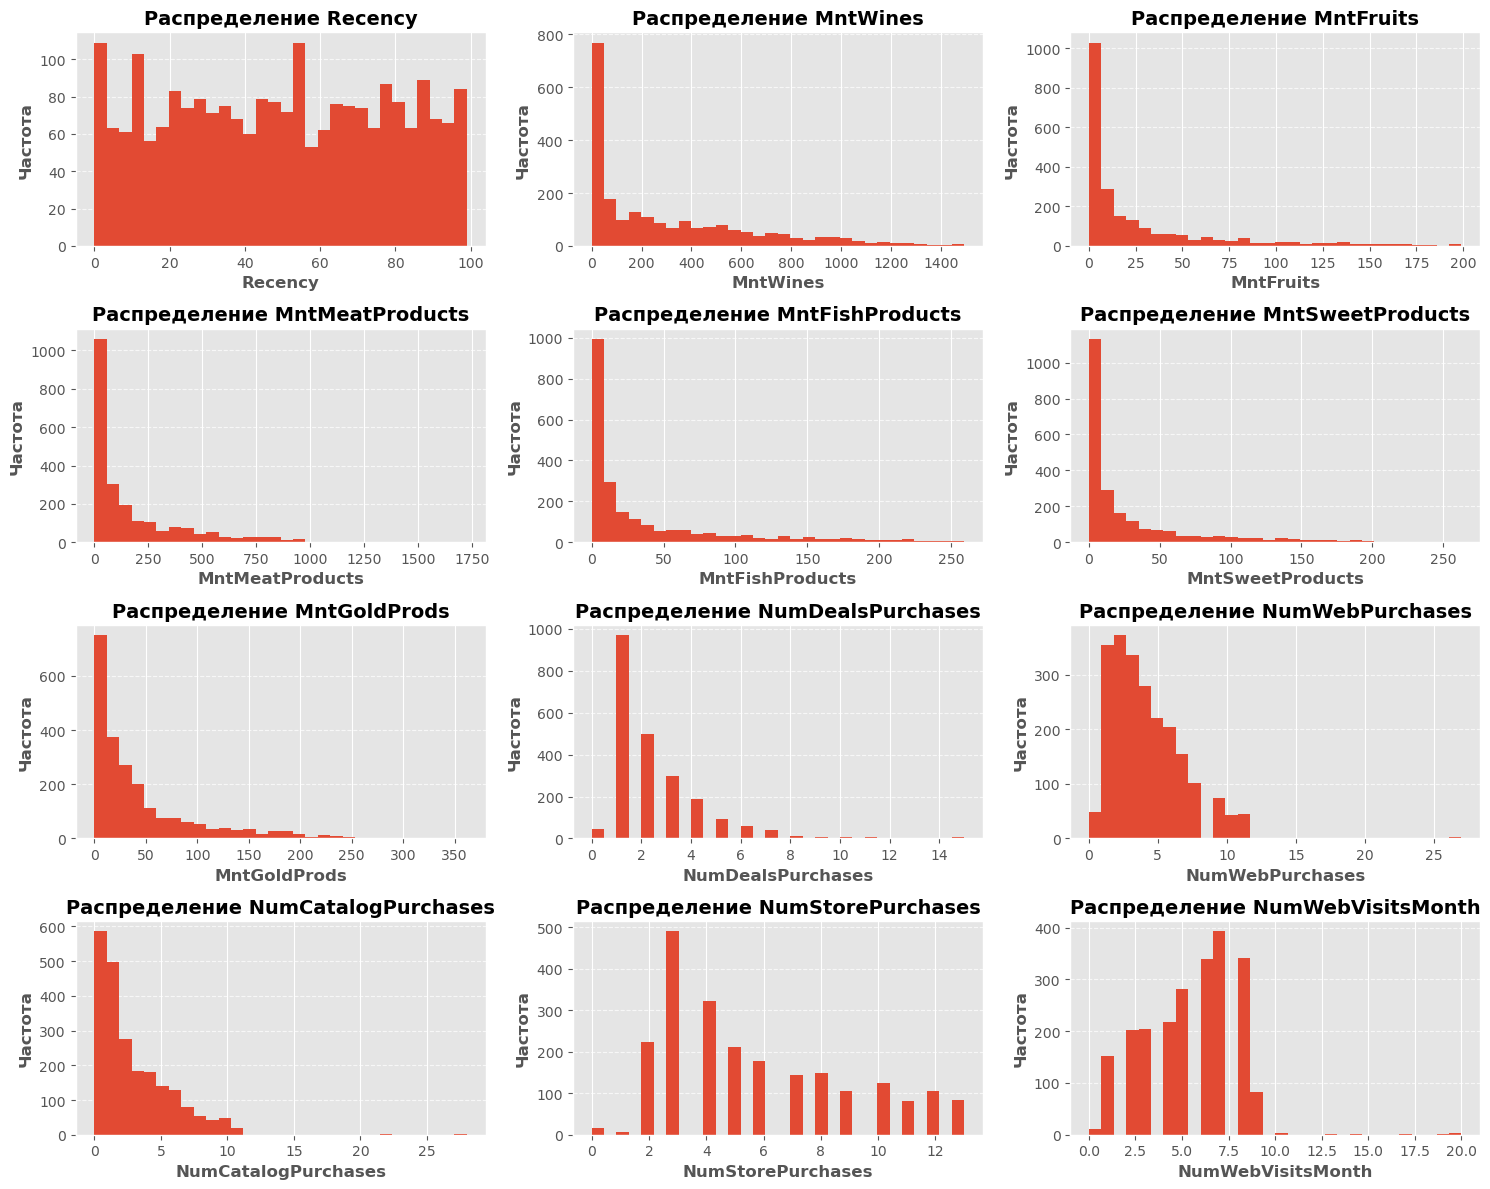

In [20]:
plt.style.use("ggplot")
columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 12))
plt.style.use("ggplot")
columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins=30)
    plt.title(f'Распределение {col}', fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12, fontweight="bold")
    plt.ylabel('Частота', fontsize=12, fontweight="bold")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

При рассмотрении распределений отдельно - подтверждаются наши выводы по боксплотам, что переменные, отражающие количество денег, потраченных на различные товары, и частоту покупок через другие каналы имеют **ненормальное распределение**. </br> Их распределение больше похоже на **экспоненциальное** (например, MntFishProducts) или **логнормальное** (например, NumDealsPurchases).

In [21]:
# Вычисление границ ящика для доходов и года рождения (IQR-метод)
Q1_income = df["Income"].dropna().quantile(0.25)
Q3_income = df["Income"].dropna().quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

Q1_year_birth = df["Year_Birth"].quantile(0.25)
Q3_year_birth = df["Year_Birth"].quantile(0.75)
IQR_year_birth = Q3_year_birth - Q1_year_birth
lower_bound_year_birth = Q1_year_birth - 1.5 * IQR_year_birth
upper_bound_year_birth = Q3_year_birth + 1.5 * IQR_year_birth

print("### Статистика по доходам (Income) ###")
print(f"Min: {df['Income'].min():.1f}")
print(f"Q1 (25%): {Q1_income:.1f}")
print(f"Median (50%): {df['Income'].median():.1f}")
print(f"Q3 (75%): {Q3_income:.1f}")
print(f"Max: {df['Income'].max():.1f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_income:.1f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_income:.1f}\n")

print("### Статистика по году рождения (Year_Birth) ###")
print(f"Min: {df['Year_Birth'].min():.0f}")
print(f"Q1 (25%): {Q1_year_birth:.0f}")
print(f"Median (50%): {df['Year_Birth'].median():.0f}")
print(f"Q3 (75%): {Q3_year_birth:.0f}")
print(f"Max: {df['Year_Birth'].max():.0f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_year_birth:.0f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_year_birth:.0f}\n")


### Статистика по доходам (Income) ###
Min: 1730.0
Q1 (25%): 35303.0
Median (50%): 51381.5
Q3 (75%): 68522.0
Max: 666666.0
Lower Bound (1.5*IQR): -14525.5
Upper Bound (1.5*IQR): 118350.5

### Статистика по году рождения (Year_Birth) ###
Min: 1893
Q1 (25%): 1959
Median (50%): 1970
Q3 (75%): 1977
Max: 1996
Lower Bound (1.5*IQR): 1932
Upper Bound (1.5*IQR): 2004



**По итогам анализа выбросов**:


* **Удалить** наблюдения **с годом рождения** клиента (Year_Birth) равным 1893, 1899 и 1900 как **аномально низкие**
* **Удалить** наблюдение **с доходом** (Income) равным **666.666 у.е., как аномально высокое**
* Остальные значения оставить ввиду их ненормального распределения изначально

**Для нечисловых переменных необходимо также:**
* Заменить семейный статус (Marital_Status) с значений "Alone", "Abdsurd" и "Yolo" на "Single" как наиболее близкие по смысловому значению
* Перевести дату регистрации (Dt_Customer) в общепринятый вид  




## **Анализ таргета**

In [22]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Total_Spending                  int64
Total_Spending_Bins          category
dtype: object

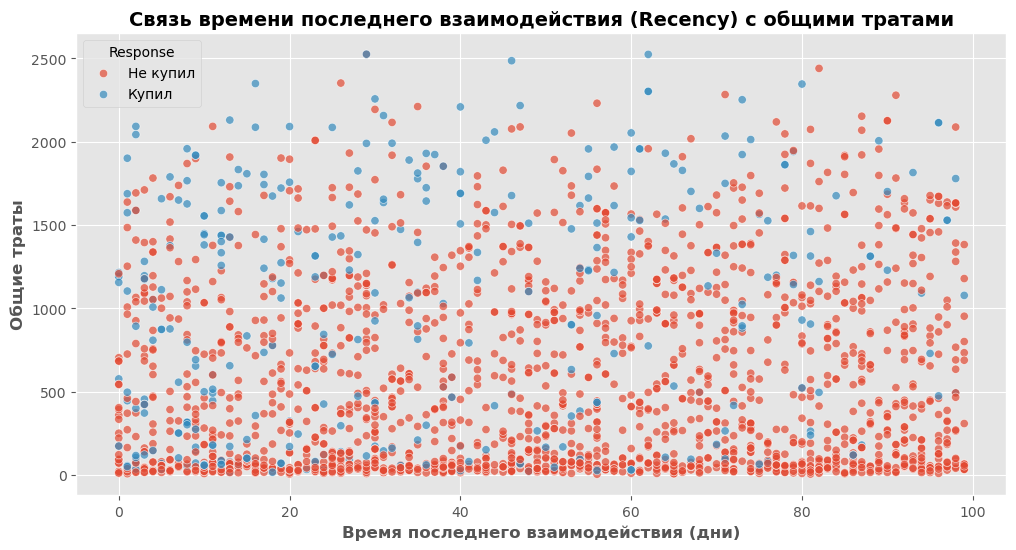

In [23]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Recency', y='Total_Spending', hue='Response', alpha=0.7, color='skyblue')
plt.title('Связь времени последнего взаимодействия (Recency) с общими тратами', fontsize=14, fontweight="bold")
plt.xlabel('Время последнего взаимодействия (дни)', fontsize=12, fontweight="bold")
plt.ylabel('Общие траты', fontsize=12, fontweight="bold")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Не купил', 'Купил'], title="Response")
plt.show()

На графике видно, что **нет связи между общими трататми и временем взаимодействия**. <br/> По отношению к таргету:
* **cвязи с временем последнего взаимодействия нет**
* **cвязь с общими тратами скорее всего есть.** На более высоких уровнях дохода находится большее количество точек, отвечающих за Response равный "Купил". Это означает, что клиенты с большими общими тратами чаще соглашаютсяна маркетинговое предложение, чем клиенты с более низким числом общих трат.


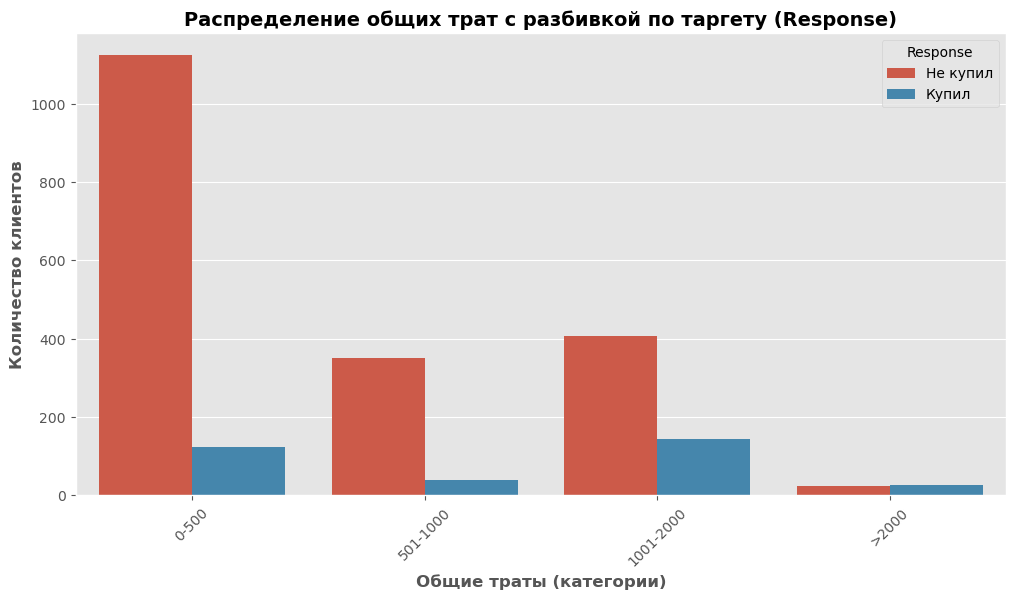

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='Total_Spending_Bins',
    hue='Response',
    order=['0-500', '501-1000', '1001-2000', '>2000'],
    #D62728'skyblue'
)
plt.title('Распределение общих трат с разбивкой по таргету (Response)', fontsize=14, fontweight="bold")
plt.xlabel('Общие траты (категории)', fontsize=12, fontweight="bold")
plt.ylabel('Количество клиентов', fontsize=12, fontweight="bold")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Не купил', 'Купил'], title="Response")
plt.xticks(rotation=45)
plt.show()

При распределении общих трат по группам с шагом в 500 у.е. также наглядно видно, что **при увеличении трат доля ответивших на маркетинговую компанию возрастает (Купил)**

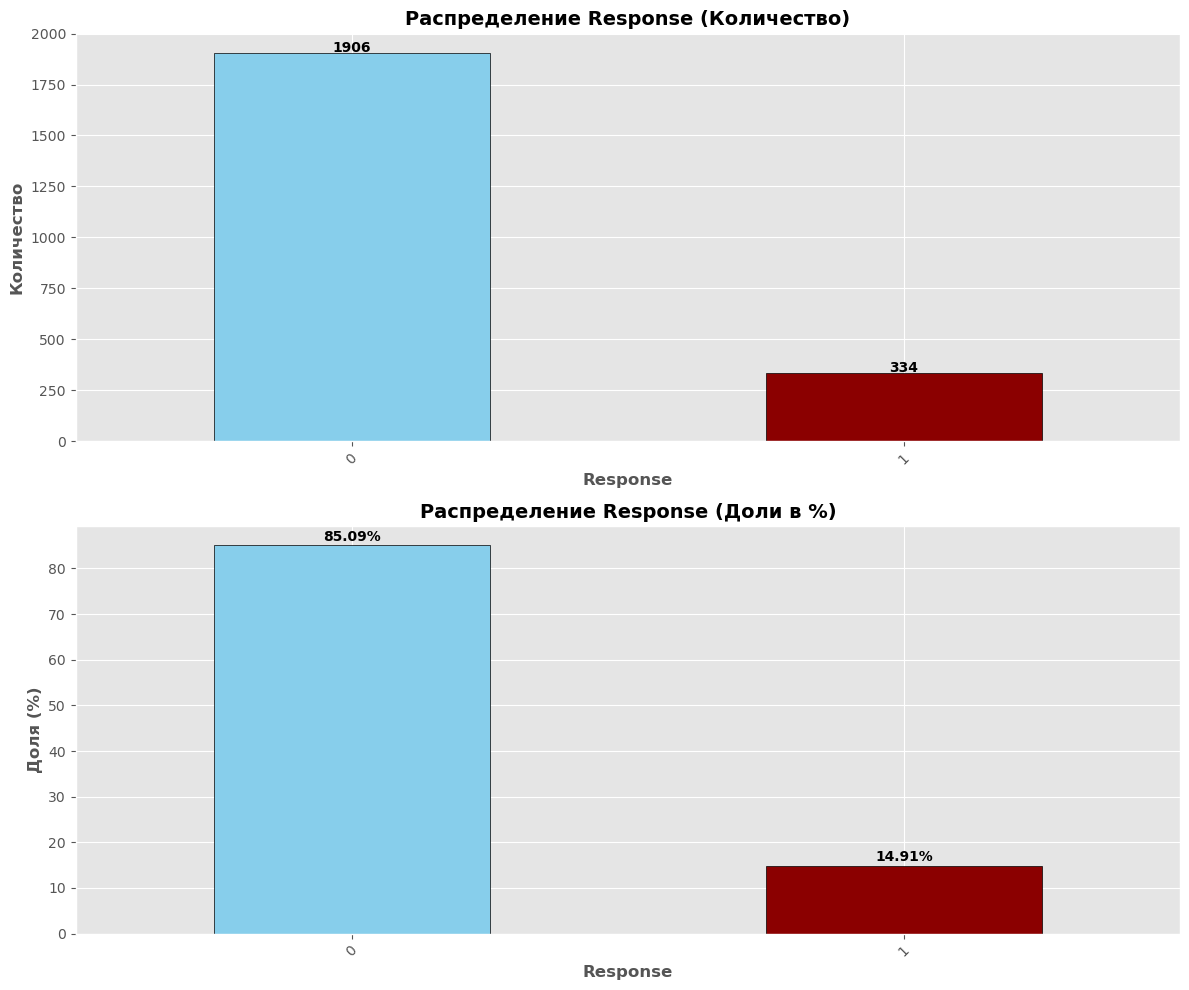

In [25]:
# Устанавливаем стиль
plt.style.use("ggplot")

# Кастомная палитра
custom_palette = {0: "skyblue", 1: "darkred"}

plt.figure(figsize=(12, 10))

# Первый график (количество)
plt.subplot(2, 1, 1)
response_counts = df['Response'].value_counts()
bars = response_counts.plot(kind='bar',
                            color=[custom_palette[val] for val in response_counts.index],
                            edgecolor='black')
plt.title('Распределение Response (Количество)', fontsize=14, fontweight="bold")
plt.xlabel('Response', fontsize=12, fontweight="bold")
plt.ylabel('Количество', fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')

# Второй график (процентное распределение)
plt.subplot(2, 1, 2)
response_proportions = df['Response'].value_counts(normalize=True) * 100
bars = response_proportions.plot(kind='bar',
                                 color=[custom_palette[val] for val in response_proportions.index],
                                 edgecolor='black')
plt.title('Распределение Response (Доли в %)', fontsize=14, fontweight="bold")
plt.xlabel('Response', fontsize=12, fontweight="bold")
plt.ylabel('Доля (%)', fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{bar.get_height():.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

В абсолютном и относительном отношении - **доля ответивших на маркетинговую кампанию ниже ответивших (14,91% или 334 человека против 85,09% или 1906 человек)**

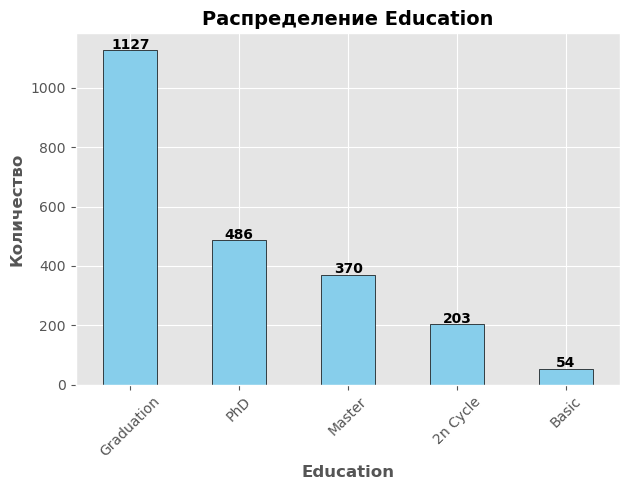

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
education_counts = df['Education'].value_counts()
bars = education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение Education', fontsize=14, fontweight="bold")
plt.xlabel('Education', fontsize=12, fontweight="bold")
plt.ylabel('Количество', fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

**Образование у клиентов в выборке преимущественно высшее**: топ-3 категории -  Graduation, PhD и Master.

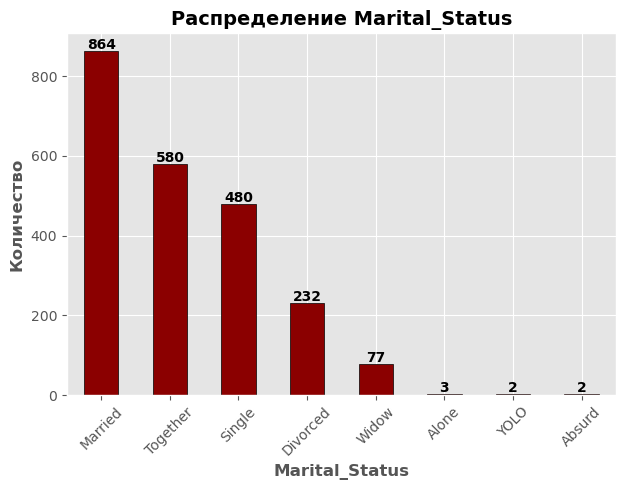

In [27]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
marital_counts = df['Marital_Status'].value_counts()
bars = marital_counts.plot(kind='bar', color='darkred', edgecolor='black')
plt.title('Распределение Marital_Status', fontsize=14, fontweight="bold")
plt.xlabel('Marital_Status', fontsize=12, fontweight="bold")
plt.ylabel('Количество', fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

Также **преимущественно клиенты в выборке не одиноки** - женаты (864 чел.) или сожительствуют с кем-то (580 чел.) <br/>
Для следующих этапов необходимо заменить семейный статус (Marital_Status) с значений "Alone", "Abdsurd" и "YOLO" на "Single" как наиболее близкие по смысловому значению

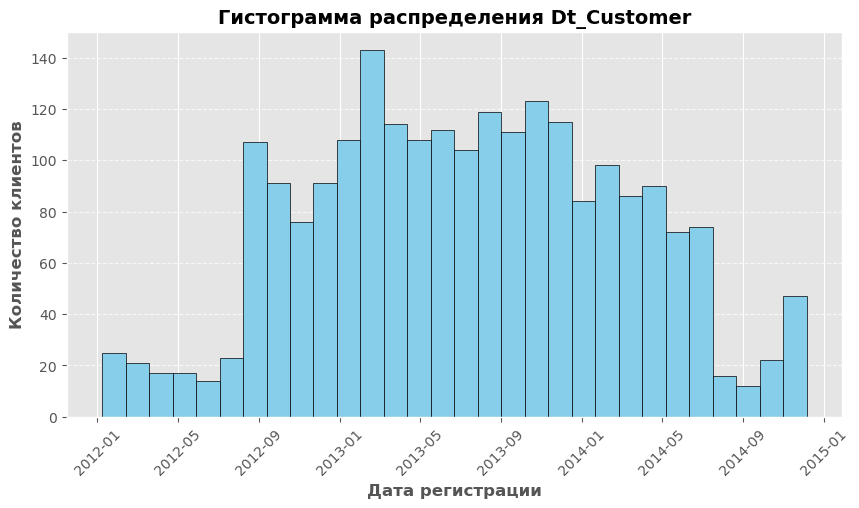

Выбросы в Dt_Customer:
Empty DataFrame
Columns: [Dt_Customer]
Index: []


In [28]:
plt.style.use("ggplot")
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')
plt.figure(figsize=(10, 5))
plt.hist(df['Dt_Customer'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения Dt_Customer', fontsize=14, fontweight="bold")
plt.xlabel('Дата регистрации', fontsize=12, fontweight="bold")
plt.ylabel('Количество клиентов', fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Q1 = df['Dt_Customer'].quantile(0.25)
Q3 = df['Dt_Customer'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
outliers = df[(df['Dt_Customer'] < lower_whisker) | (df['Dt_Customer'] > upper_whisker)]
print("Выбросы в Dt_Customer:")
print(outliers[['Dt_Customer']])

Распределение дат регистрации клиентов представляет собой **плосковершинное распределение, похожее на нормальное**.  Все клиенты из выборки прошли регистрации **с 2012 по 2015 года**.

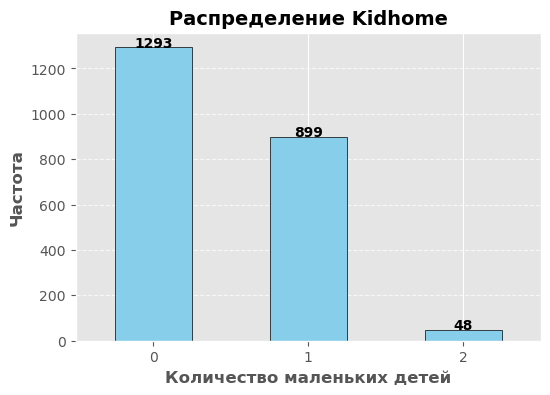

In [29]:
plt.style.use("ggplot")
plt.figure(figsize=(6, 4))
df['Kidhome'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение Kidhome', fontsize=14, fontweight="bold")
plt.xlabel('Количество маленьких детей', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Kidhome'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, fontweight='bold')

plt.show()

Преимущественно в выборке клиенты либо **не имеют детей младшего возраста** (1293 чел.), либо **имеют одного ребенка младшего возраста в семье** (899 чел.).

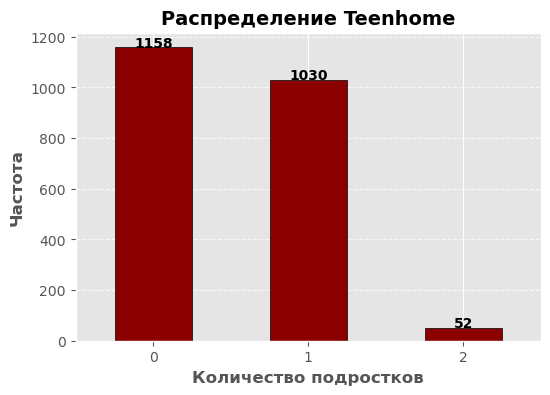

In [30]:
plt.style.use("ggplot")
plt.figure(figsize=(6, 4))
df['Teenhome'].value_counts().sort_index().plot(kind='bar', color='darkred', edgecolor='black')
plt.title('Распределение Teenhome', fontsize=14, fontweight="bold")
plt.xlabel('Количество подростков', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Teenhome'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, fontweight='bold')
plt.show()

Преимущественно в выборке клиенты либо **не имеют детей-подростков** (1158 чел.), либо **имеют одного ребенка-подростка в семье** (1030 чел.).

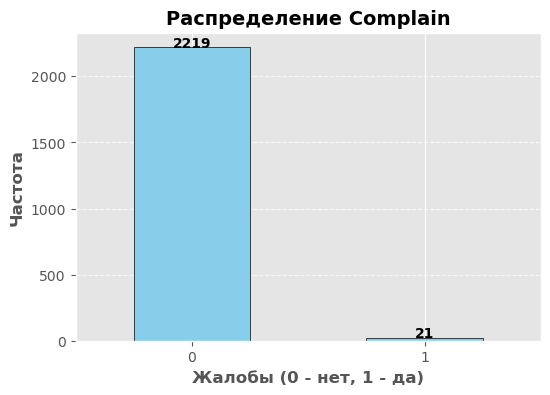

In [31]:
plt.style.use("ggplot")
plt.figure(figsize=(6, 4))
df['Complain'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение Complain', fontsize=14, fontweight="bold")
plt.xlabel('Жалобы (0 - нет, 1 - да)', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Complain'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, fontweight='bold')
plt.show()

Распределение жалоб показывает, что **жаловались менее 1% клиентов (21 чел.)**

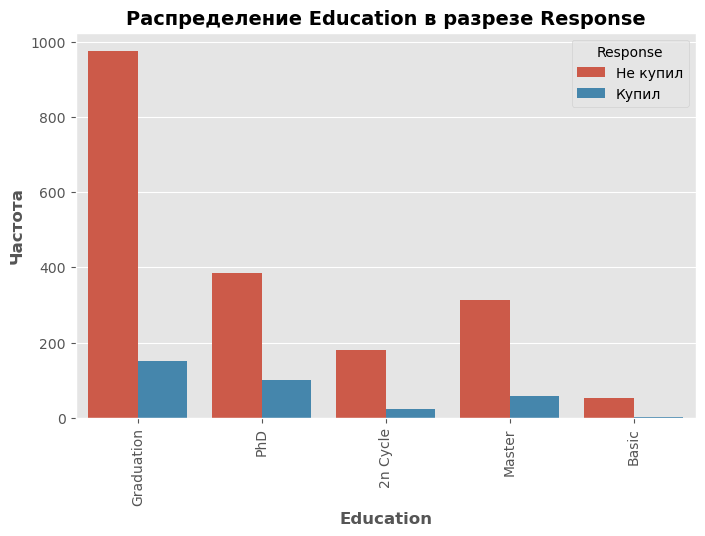

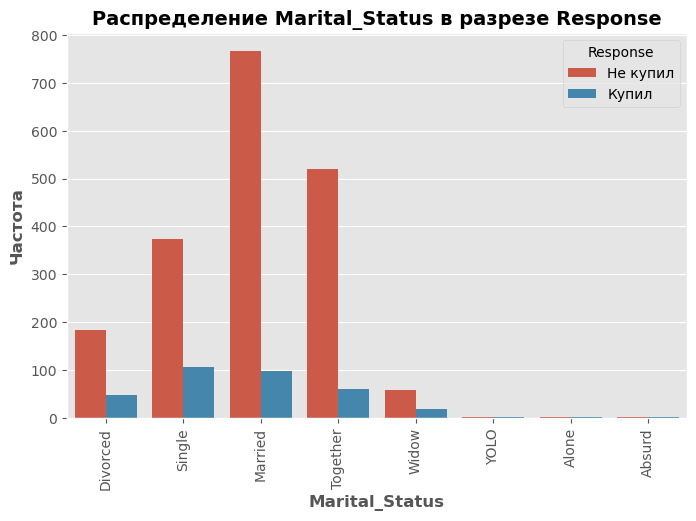

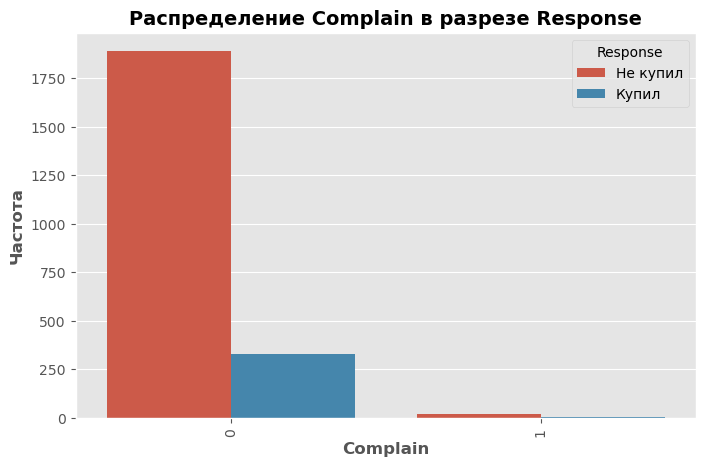

In [32]:
plt.style.use("ggplot")

custom_labels = ['Не купил', 'Купил']  # Кастомные подписи

for i, var in enumerate(['Education', 'Marital_Status', 'Complain'], 1):
    plt.figure(figsize=(8, 5))

    # Создаем countplot
    sns.countplot(data=df, x=var, hue='Response')

    # Заголовок
    plt.title(f'Распределение {var} в разрезе Response', fontsize=14, fontweight="bold")

    # Подписи осей
    plt.xlabel(var, fontsize=12, fontweight="bold")
    plt.ylabel('Частота', fontsize=12, fontweight="bold")

    # Устанавливаем кастомные подписи
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, custom_labels, title="Response")

    # Поворот меток на оси X
    plt.xticks(rotation=90)

    # Показываем график
    plt.show()

При рассмотрении кол-ва клиентов из выборке по семейному статусу, образованию и жалобам в разбиении по таргету (ответ на маркетинговую кампанию) можно увидеть:
* клиенты **с более высоким уровнем** образования (PhD, Master, Gradution) **чаще реагируют положительно** на маркетинговую кампанию
* клиенты, находящиеся **в отношениях/в браке** (Married, Together), **реже реагируют положительно** на маркетинговую кампанию, если смотреть на относительное сравнение внутри групп (доли)
* **клиенты, которые не жаловались,** составляют подавляющее **большинство, которое отреагировали положительно** на маркетинговую кампанию

<Figure size 1600x1000 with 0 Axes>

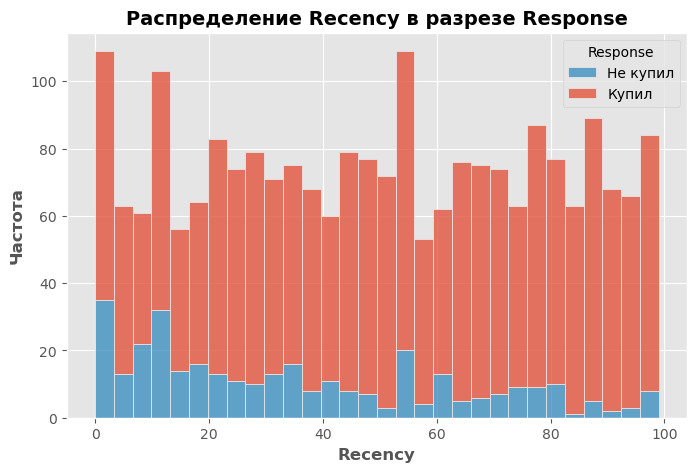

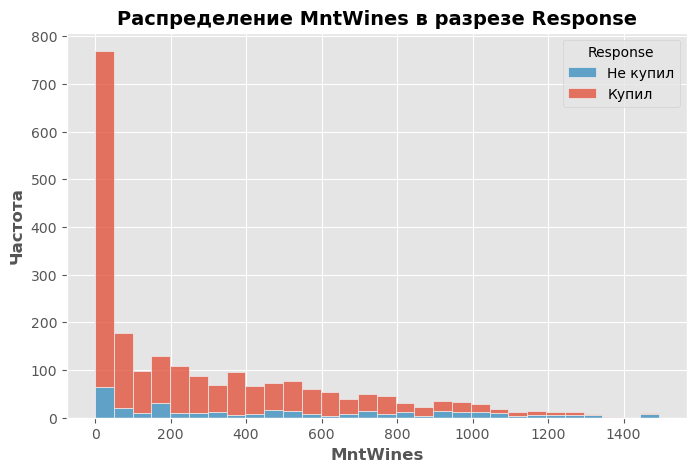

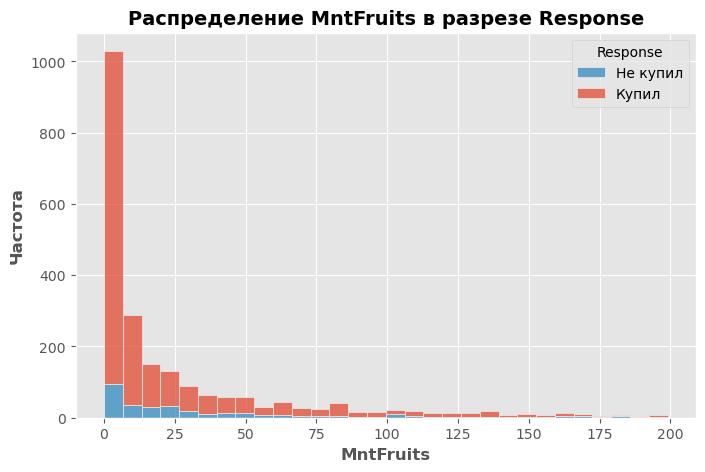

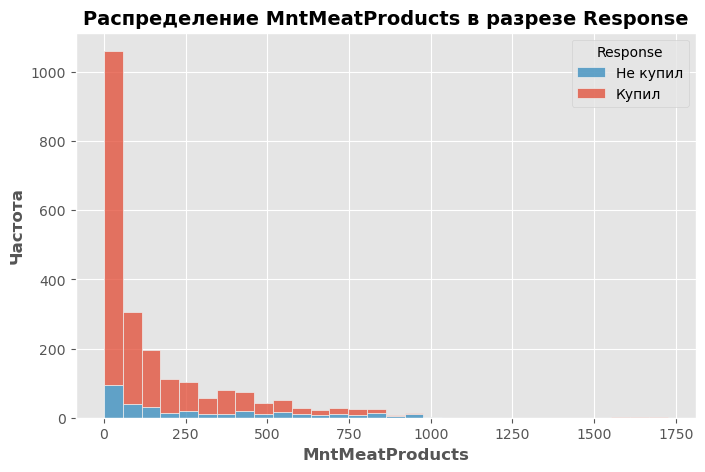

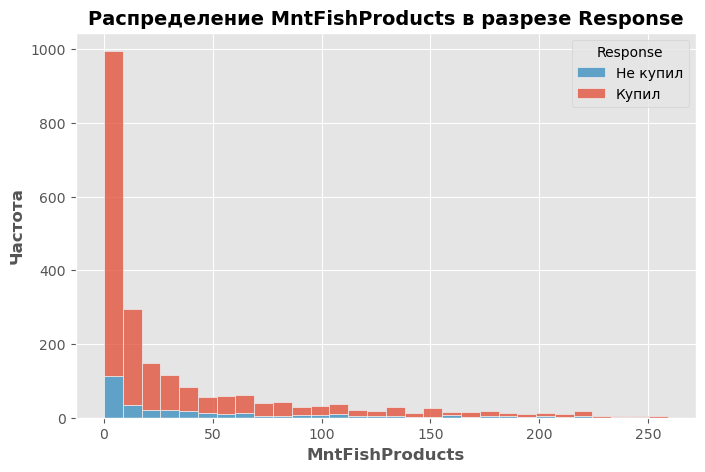

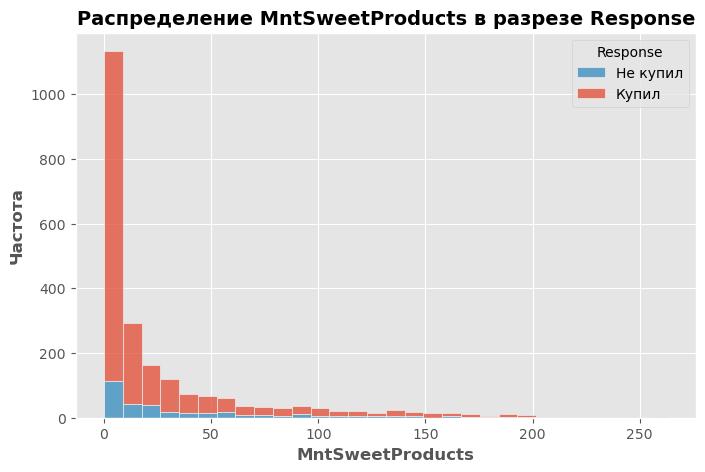

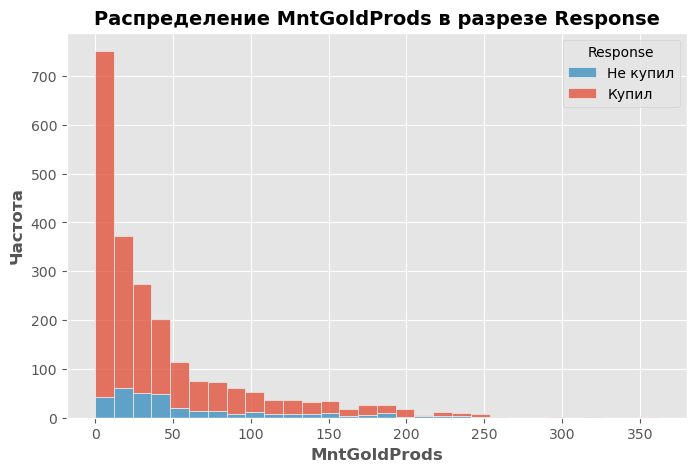

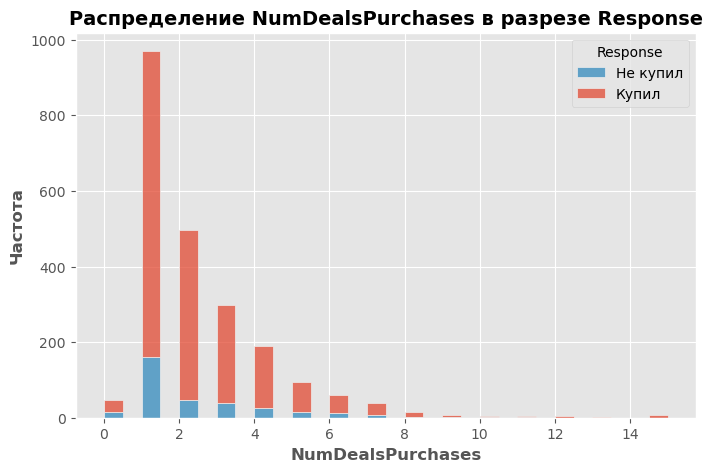

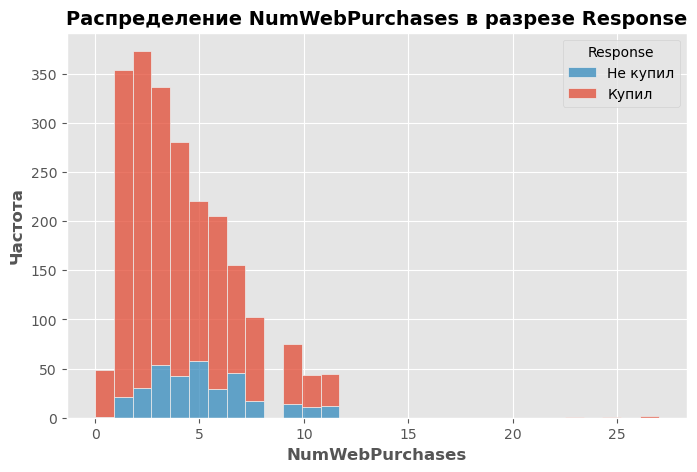

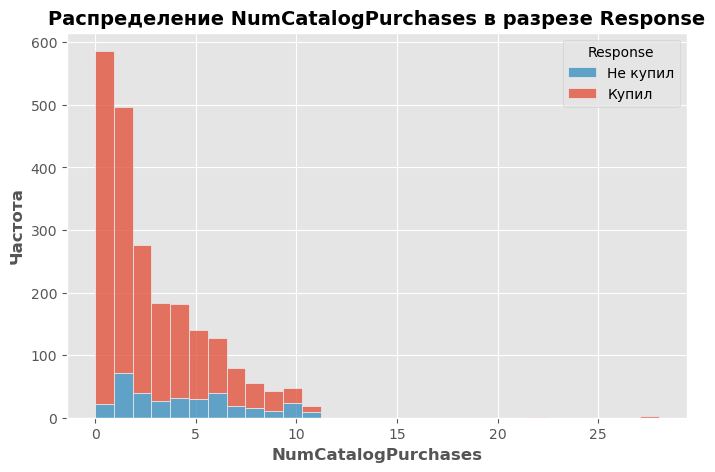

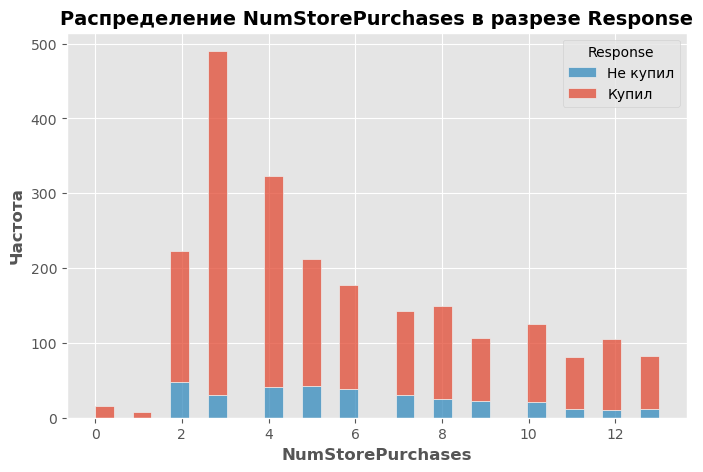

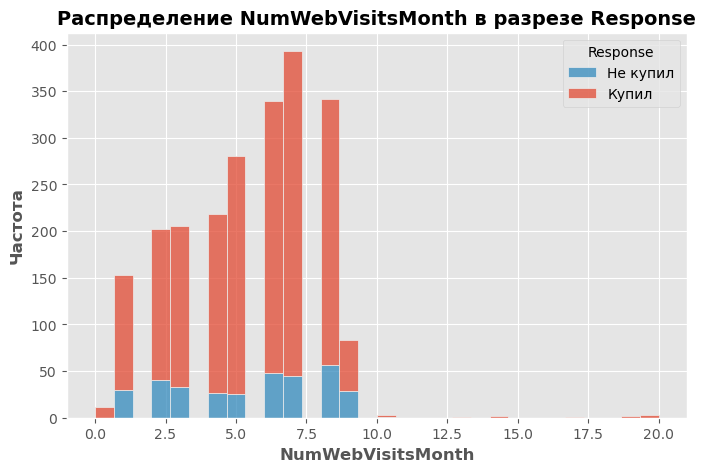

In [33]:
# Применяем стиль
plt.style.use("ggplot")

# Кастомные лейблы для Response
custom_labels = ['Не купил', 'Купил']

# Задаем размер графиков
plt.figure(figsize=(16, 10))

# Для каждого столбца в columns
for var in columns:
    plt.figure(figsize=(8, 5))

    # Строим гистограмму по частоте
    sns.histplot(df, x=var, hue='Response', bins=30, stat="count", multiple="stack", kde=False)

    # Заголовок с улучшениями
    plt.title(f'Распределение {var} в разрезе Response', fontsize=14, fontweight="bold")

    # Подписи осей
    plt.xlabel(var, fontsize=12, fontweight="bold")
    plt.ylabel('Частота', fontsize=12, fontweight="bold")

    # Добавляем легенду
    plt.legend(title="Response", labels=custom_labels)

    # Показываем график
    plt.show()

При визуальном анализе распределений наших переменных в разбивке по таргету **выделяется - MntWines, MntMeatProducts и NumCatalogPurchases**. При росте значений переменных - **доля положительных ответов на кампанию увеличивается**. Возможно, маркетинговая кампания была нацелена на определенные продукты (вино/мясо) и расположена была в каталогах.

##**Корреляционный анализ**

In [34]:
df_2 = pd.get_dummies(df, columns=["Education", "Marital_Status"])

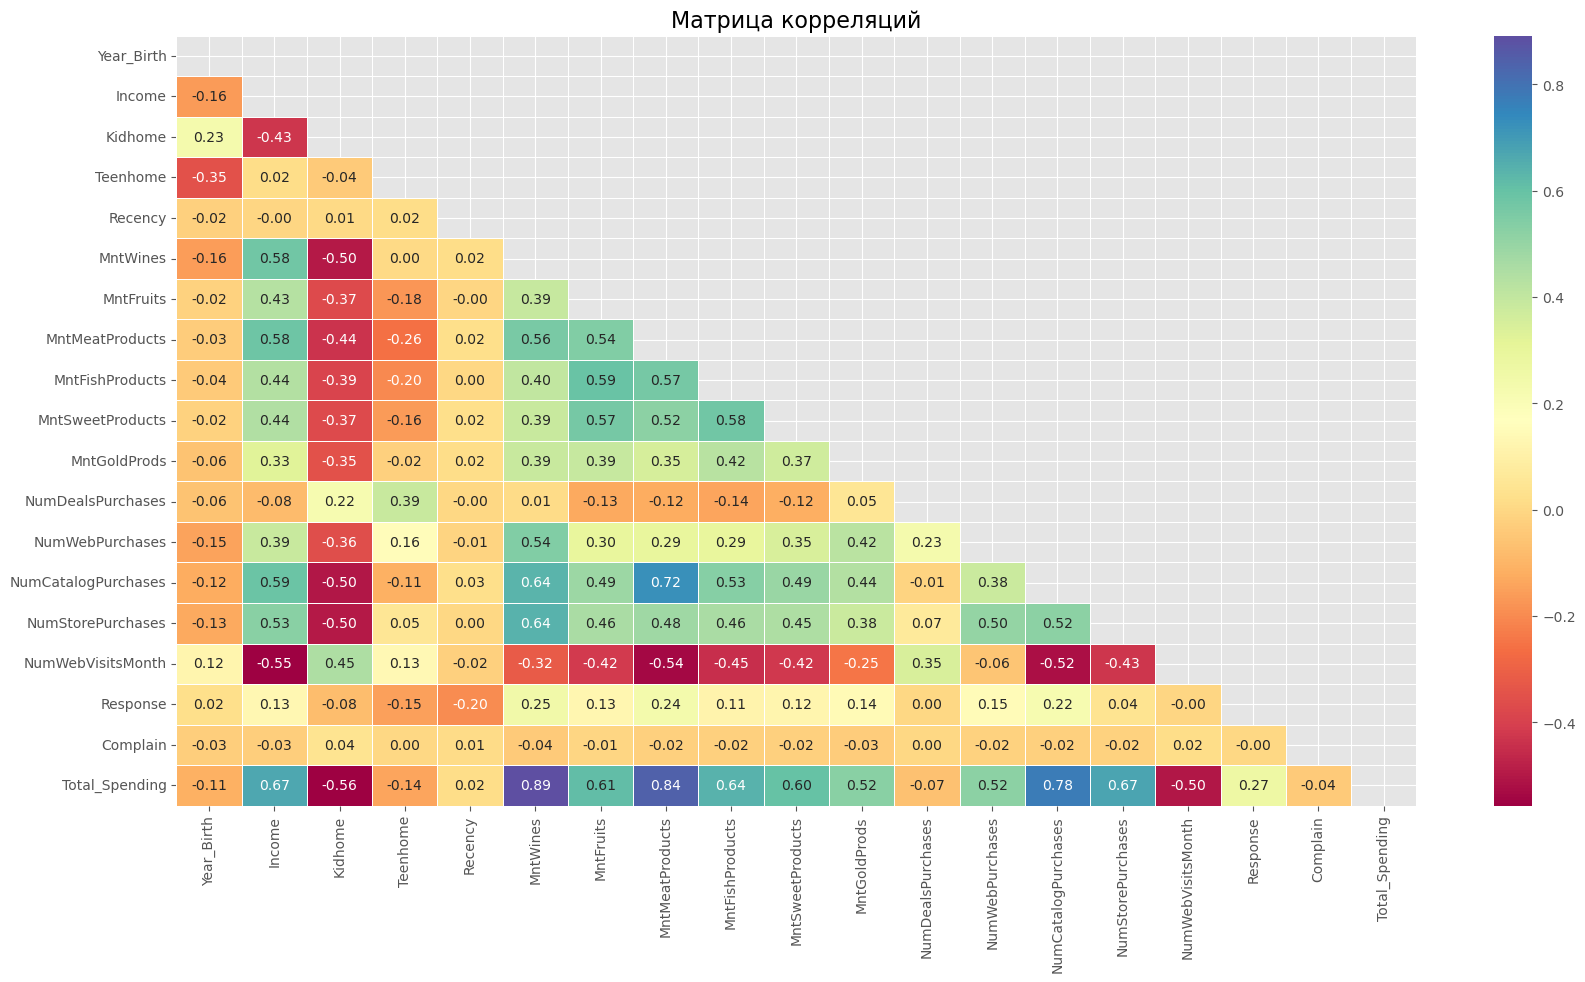

In [35]:
df_2 = df_2.drop(columns=["Id"], errors="ignore")
df_2 = df_2.select_dtypes(include=[np.number])

corr_mat = df_2.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

plt.style.use("ggplot")
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, mask=mask, annot=True, fmt=".2f", cmap="Spectral", linewidths=0.5)
plt.title("Матрица корреляций", fontsize=16)
plt.show()

In [36]:
corr_abs = corr_mat.abs()
strong_corr = []
col_names = corr_mat.columns
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):
        if corr_abs.iloc[i, j] > 0.1:
            strong_corr.append((col_names[i], col_names[j], corr_mat.iloc[i, j]))
strong_corr = sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True)
'''
Исправлена логическая ошибка в порядке условий для отрицательных значений корреляции.
Условия проверяются последовательно, и если первое условие corr_value >= -0.1
истинно, то все последующие условия не будут проверяться.
'''
def correlation_strength(corr_value):
    if corr_value >= 0.7:
        return 'Очень сильная положительная'
    elif corr_value >= 0.5:
        return 'Сильная положительная'
    elif corr_value >= 0.3:
        return 'Умеренная положительная'
    elif corr_value >= 0.1:
        return 'Слабая положительная'
    elif corr_value >= -0.1:
        return 'Очень слабая связь'
    elif corr_value >= -0.3:
        return 'Слабая отрицательная'
    elif corr_value >= -0.5:
        return 'Умеренная отрицательная'
    elif corr_value >= -0.7:
        return 'Сильная отрицательная'
    else:
        return 'Очень сильная отрицательная'

# Поиск переменных с очень сильной попарной корреляцией (мультиколлинеарность)
strong_pair_corr = [
    (col_names[i], col_names[j], corr_mat.iloc[i, j])
    for i in range(len(col_names))
    for j in range(i + 1, len(col_names))
    if abs(corr_mat.iloc[i, j]) >= 0.7]

strong_pair_corr.sort(key=lambda x: abs(x[2]), reverse=True)
print("\nПеременные с очень сильной попарной корреляцией (|corr| ≥ 0.7) (поиск мультиколлинеарности):")
if strong_pair_corr:
    for var1, var2, corr_value in strong_pair_corr:
        print(f" {var1} и {var2}: {corr_value:.4f}")
else:
    print("Нет пар переменных с очень сильной корреляцией (мультиколлинеарность не выявлена).")

corr_abs = corr_mat.abs()
col_names = corr_mat.columns

#2. Анализ корреляции с таргетом (`Response`)**
if "Response" in col_names:
    response_corr = corr_mat["Response"].drop("Response").abs().sort_values(ascending=False)

    # Функция классификации силы корреляции
    def correlation_strength(corr_value):
        if corr_value >= 0.7:
            return 'Очень сильная'
        elif corr_value >= 0.5:
            return 'Сильная'
        elif corr_value >= 0.3:
            return 'Умеренная'
        elif corr_value >= 0.1:
            return 'Слабая'
        else:
            return 'Очень слабая'

    # Выводим ТОП-5 признаков по модулю корреляции с Response
    print("\nТОП-5 признаков по корреляции с таргетом (`Response`):")
    top_5_features = response_corr.head(5)

    for feature, corr_value in top_5_features.items():
        correlation_type = correlation_strength(corr_value)
        print(f" {feature}: {corr_value:.4f} ({correlation_type} связь)")

else:
    print("\nТаргет `Response` не найден в данных.")


Переменные с очень сильной попарной корреляцией (|corr| ≥ 0.7) (поиск мультиколлинеарности):
 MntWines и Total_Spending: 0.8918
 MntMeatProducts и Total_Spending: 0.8430
 NumCatalogPurchases и Total_Spending: 0.7786
 MntMeatProducts и NumCatalogPurchases: 0.7238

ТОП-5 признаков по корреляции с таргетом (`Response`):
 Total_Spending: 0.2653 (Слабая связь)
 MntWines: 0.2473 (Слабая связь)
 MntMeatProducts: 0.2363 (Слабая связь)
 NumCatalogPurchases: 0.2208 (Слабая связь)
 Recency: 0.1984 (Слабая связь)


###**Пары признаков с очень сильной попарной корреляцией:**
**MntMeatProducts и NumCatalogPurchases: 0.7238** (Очень сильная положительная): <br/>
Клиенты, тратящие **больше денег на мясные продукты**, также **чаще делают покупки по каталогу**. Возможно, они склонны делать крупные заказы дистанционно.  

**MntWines** и **NumStorePurchases: 0.6421** (Сильная положительная): <br/>
Люди, которые **тратят больше на вино**, также **чаще совершают покупки в физических магазинах**. Возможно, они предпочитают выбирать алкоголь лично, а не заказывать онлайн.  

**MntWines** и **NumCatalogPurchases: 0.6352** (Сильная положительная): <br/>
Покупатели, **активно приобретающие вино**, также **делают заказы через каталог**. Это может говорить о наличии у них доверия к дистанционным покупкам.  

**MntFruits** и **MntFishProducts: 0.5948** (Сильная положительная): <br/>
Клиенты, **покупающие фрукты**, также **тратят значительные суммы на рыбу**. Это может свидетельствовать о наличии у них предпочтений в пользу здорового питания.  

**Income и NumCatalogPurchases: 0.5868** (Сильная положительная): <br/>
**Более состоятельные клиенты чаще совершают покупки по каталогу**, что может говорить о высокой загруженности или привычке к дистанционному шопингу.  

**MntFishProducts и MntSweetProducts: 0.5799** (Сильная положительная): <br/> Покупатели, **активно приобретающие рыбу**, также **покупают сладости**. Это может указывать на сбалансированный рацион или наличие определённых вкусовых предпочтений.  

**Income и MntMeatProducts: 0.5778** (Сильная положительная): <br/>
 **Люди с более высоким доходом тратят больше денег на мясные продукты**. Возможно, они предпочитают более дорогие и качественные виды мяса.  

**Income и MntWines: 0.5769** (Сильная положительная): <br/> **Состоятельные клиенты склонны тратить больше на вино.** Это может свидетельствовать о престижности данного продукта среди обеспеченной аудитории.  

**MntMeatProducts и MntFishProducts: 0.5684** (Сильная положительная): <br/>  Покупатели, **тратящие много денег на мясо**, также **склонны к покупкам рыбы**, что может говорить об общей привычке покупать качественные продукты животного происхождения.  

**MntFruits и MntSweetProducts: 0.5672** (Сильная положительная): <br/>  Те, кто **покупает фрукты**, также **тратят деньги на сладости.** Это может указывать на наличие разнообразного рациона или предпочтений в сторону десертов и здоровых закусок.  

**MntWines и MntMeatProducts: 0.5627** (Сильная положительная): <br/> **Покупатели вина также часто тратят деньги на мясные продукты**, возможно, сочетая их в своих предпочтениях.  

**Income и NumWebVisitsMonth: -0.5498** (Сильная отрицательная): <br/> **Более обеспеченные клиенты реже посещают сайт компании.** Это может говорить о том, что они предпочитают делать покупки в других местах или доверяют каталогам и магазинам.  


---

В связи с сильной попарной корреляцией между раличными статьями (категориями) расходов в будущем **стоит рассмотреть использование единой переменной всех расходов в модели, чтобы исключить мультиколлинеарность.**


Корреляция переменных с Response:
Total_Spending         0.265298
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.133047
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64


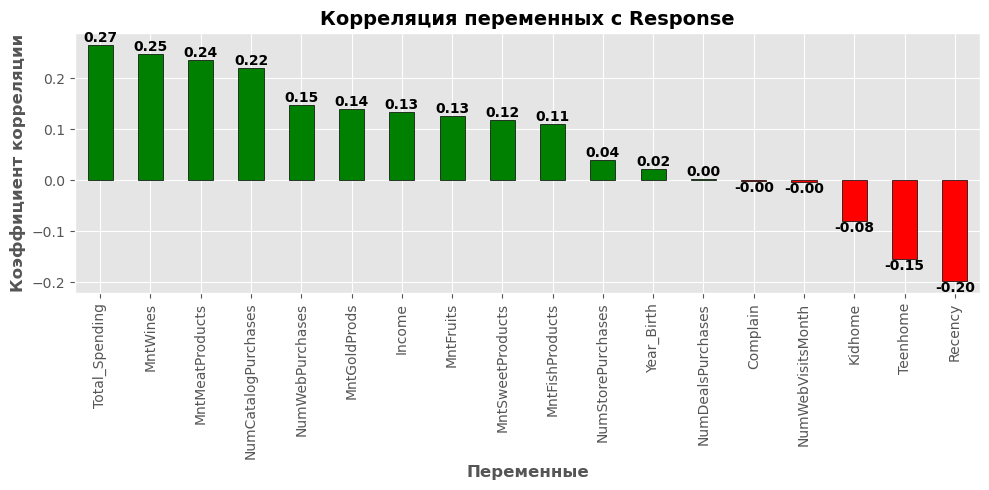

In [37]:
df_2 = df_2.drop(columns=['Id'], errors='ignore')
response_corr = df_2.corr()['Response'].drop('Response', errors='ignore').sort_values(ascending=False)
print("Корреляция переменных с Response:")
print(response_corr)

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
bars = response_corr.plot(kind='bar', color=['red' if x < 0 else 'green' for x in response_corr], edgecolor='black')
plt.title('Корреляция переменных с Response', fontsize=14, fontweight="bold")
plt.xlabel('Переменные', fontsize=12, fontweight="bold")
plt.ylabel('Коэффициент корреляции', fontsize=12, fontweight="bold")
plt.xticks(rotation=90)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center',
             va='bottom' if bar.get_height() > 0 else 'top',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

MntWines (0.247254) и MntMeatProducts (0.236335) показывают наибольшую положительную корреляцию с Response. Это означает, что клиенты, **которые тратят больше на вино и мясные продукты, с большей вероятностью принимают предложение компании**. </br>
И наоборот - **наличие детей и количество дней, которое прошло с последней покупки уменьшают вероятность принять маркетинговое предложение**, так как попарная корреляция Kidhome, Teenhome и Recency отрицательная.

C:\Users\Crxdu\AppData\Local\Temp\ipykernel_24384\20787407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Response", y="Income", data=df, palette={"Не купил": "skyblue", "Купил": "darkred"})


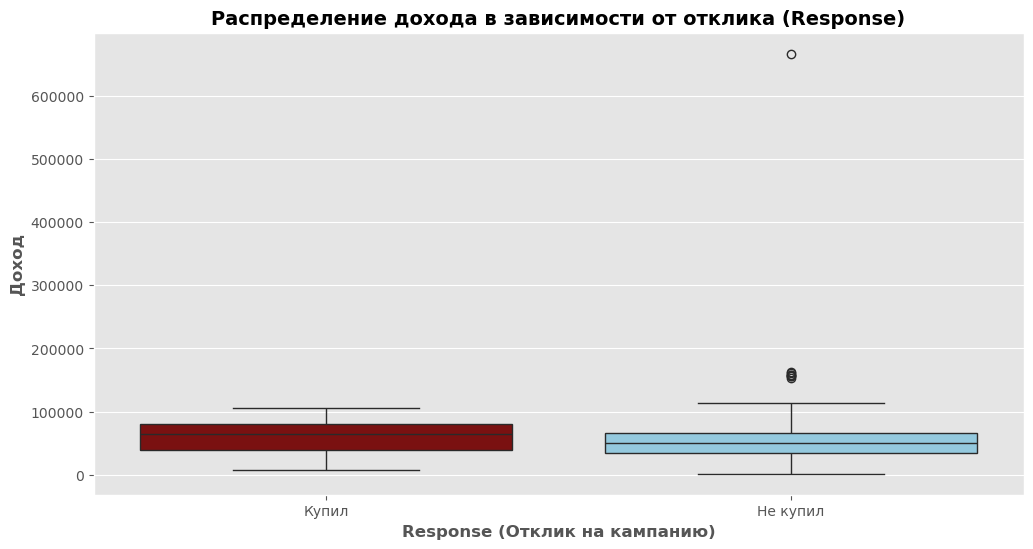

C:\Users\Crxdu\AppData\Local\Temp\ipykernel_24384\20787407.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Response", y="Income", data=df_filtered, palette={"Не купил": "skyblue", "Купил": "darkred"})


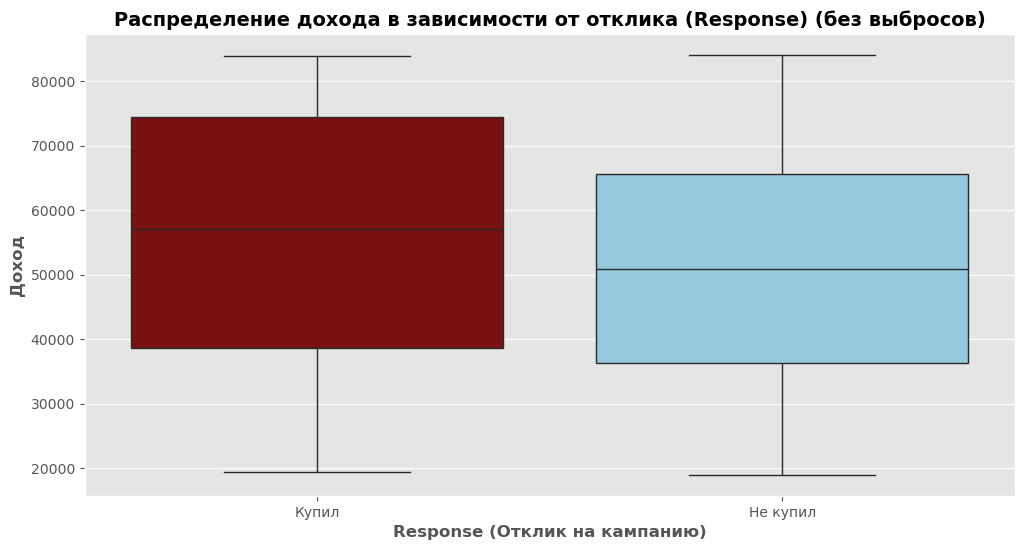

In [38]:
# Применяем стиль
plt.style.use("ggplot")

# Кастомные лейблы для Response
df['Response'] = df['Response'].map({0: 'Не купил', 1: 'Купил'})

# Стандартный боксплот (с выбросами) с кастомной палитрой
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Income", data=df, palette={"Не купил": "skyblue", "Купил": "darkred"})
plt.title("Распределение дохода в зависимости от отклика (Response)", fontsize=14, fontweight="bold")
plt.xlabel("Response (Отклик на кампанию)", fontsize=12, fontweight="bold")
plt.ylabel("Доход", fontsize=12, fontweight="bold")
plt.show()

# Фильтрация выбросов (5-95 перцентиль)
low, high = np.percentile(df["Income"].dropna(), [5, 95])
df_filtered = df[(df["Income"] >= low) & (df["Income"] <= high)]

# Боксплот без выбросов с кастомной палитрой
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Income", data=df_filtered, palette={"Не купил": "skyblue", "Купил": "darkred"})
plt.title("Распределение дохода в зависимости от отклика (Response) (без выбросов)", fontsize=14, fontweight="bold")
plt.xlabel("Response (Отклик на кампанию)", fontsize=12, fontweight="bold")
plt.ylabel("Доход", fontsize=12, fontweight="bold")
plt.show()


При рассмотрении доходов клиентов в зависимости от отклика на маркетинговую кампанию - мы видим, что **распределения схожи и стат.значимого различия медиан между ними нет.** **Хоть и медианный доход выше у группы тех, кто согласился.**

## **Итоги разведывательного анализа**
* Усредненный портрет клиента в датасете: ему **54 года**, зарабатывает **52 000 у.е.**, покупает преимущественно **в оффлайн-магазинах** и основной категорией трат является **вино**
* В датасете отсутствуют **дубликаты**, но **присутствуют пропущенные записи** (24 записи, менее 1%) - принято решение их удалить
* Выявлены **выбросы в переменных года рождения и дохода**, записи с аномальными значениями по данным переменным - принято решение удалить
* Найдены особенности покупательской способности клиентов и их реакции на маркетинговую кампанию (целевая переменная):
  * **Большинство клиентов (85%) не откликнулись** на маркетинговую кампанию
  * Клиенты, **не состоящие в браке**, **чаще откликаются** на маркетинговую кампанию
  * Клиенты **с более высоким уровнем** образования **чаще откликаются** на маркетинговую кампанию
  * Чаще на маркетинговую кампанию откликаются клиенты **с большими тратами на определённые категории товаров (вино, мясо, рыба), более высокой частотой покупок через каталог и и более высоким доходом**





## Проверка гипотез

**Гипотеза 1**. Средний доход клиентов, принявших предложение, выше, чем у клиентов, не принявших предложение

In [39]:
df['Response_verbose']= df['Response']
df['Response'] = df['Response_verbose'].map({'Не купил': 0, 'Купил': 1})

In [40]:
income_accepted = df[df['Response'] == 1]['Income'].dropna()
income_rejected = df[df['Response'] == 0]['Income'].dropna()

t_stat_income, p_val_income = stats.ttest_ind(income_accepted, income_rejected, equal_var=False)
print(f"T-Statistic: {t_stat_income:.4f}, P-Value: {p_val_income:.4f}")

T-Statistic: 6.7032, P-Value: 0.0000


**Гипотеза 2**. Средний возраст клиентов, принявших предложение, отличается от возраста тех, кто не принял.

In [41]:
df['Age'] = 2016 - df['Year_Birth'] # последняя дата регистрация в 2015, считаем что сейчас 2016

age_accepted = df[df['Response'] == 1]['Age']
age_rejected = df[df['Response'] == 0]['Age']

t_stat_age, p_val_age = stats.ttest_ind(age_accepted, age_rejected, equal_var=False)
print(f"T-Statistic: {t_stat_age:.4f}, P-Value: {p_val_age:.4f}")

T-Statistic: -0.9810, P-Value: 0.3271


**Гипотеза 3**.  Те, кто чаще покупает по скидке, с большей вероятностью примут новое предложение.

In [42]:
deals_accepted = df[df['Response'] == 1]['NumDealsPurchases']
deals_rejected = df[df['Response'] == 0]['NumDealsPurchases']

t_stat_deals, p_val_deals = stats.ttest_ind(deals_accepted, deals_rejected, equal_var=False)

print(f"T-Statistic: {t_stat_deals:.4f}, P-Value: {p_val_deals:.4f}")

T-Statistic: 0.0984, P-Value: 0.9217


**Гипотеза 4**.  Те, кто жаловался (Complain=1), реже принимают предложение.

In [43]:
complain_response = pd.crosstab(df['Complain'], df['Response'])
chi2, p_val_complain, dof, expected = stats.chi2_contingency(complain_response)
print(f"Chi2-Statistic: {chi2:.4f}, P-Value: {p_val_complain:.4f}")

Chi2-Statistic: 0.0000, P-Value: 1.0000


**Гипотеза 5.** Клиенты с детьми реже принимают предложение

In [44]:
df['has_kid'] = (df['Kidhome'] > 0).astype(int)
kids_response = pd.crosstab(df['has_kid'], df['Response'])

chi2_kids, p_val_kids, dof_kids, expected_kids = stats.chi2_contingency(kids_response)

print(f"Chi2-Statistic: {chi2_kids:.4f}, P-Value: {p_val_kids:.4f}")

Chi2-Statistic: 11.8802, P-Value: 0.0006


**Гипотеза 6.** Количество посещений сайта влияет на принятие предложения

In [45]:
visits_accepted = df[df['Response'] == 1]['NumWebVisitsMonth']
visits_rejected = df[df['Response'] == 0]['NumWebVisitsMonth']

u_stat_visits, p_val_visits = stats.mannwhitneyu(visits_accepted, visits_rejected, alternative='two-sided')

print(f"U-Statistic: {u_stat_visits:.4f}, P-Value: {p_val_visits:.4f}")


U-Statistic: 323793.5000, P-Value: 0.6115


In [46]:
results = pd.DataFrame({
    'Гипотеза': [
        '1. Доход отличается',
        '2. Возраст отличается',
        '3. Кол-во скидочных покупок отличается',
        '4. Связь между жалобами и принятием предложения',
        '5. Наличие детей влияет на принятие предложения',
        '6. Количество посещений сайта влияет на принятие предложения'
    ],
    'Метод тестирования': [
        't-тест (две группы)',
        't-тест (две группы)',
        't-тест (две группы)',
        'хи-квадрат тест',
        'хи-квадрат тест',
        'Манна-Уитни тест'
    ],
    'p-value': [
        p_val_income,
        p_val_age,
        p_val_deals,
        p_val_complain,
        p_val_kids,
        p_val_visits
    ],
    'Результат': [
        'Отклоняем H0' if p_val_income < 0.05 else 'Не отклоняем H0',
        'Отклоняем H0' if p_val_age < 0.05 else 'Не отклоняем H0',
        'Отклоняем H0' if p_val_deals < 0.05 else 'Не отклоняем H0',
        'Отклоняем H0' if p_val_complain < 0.05 else 'Не отклоняем H0',
        'Отклоняем H0' if p_val_kids < 0.05 else 'Не отклоняем H0',
        'Отклоняем H0' if p_val_visits < 0.05 else 'Не отклоняем H0'
    ]
})

results['p-value'] = results['p-value'].round(4)
display(results)


,Гипотеза,Метод тестирования,p-value,Результат
0,1. Доход отличается,t-тест (две группы),0.0000,Отклоняем H0
1,2. Возраст отличается,t-тест (две группы),0.3271,Не отклоняем H0
2,3. Кол-во скидочных покупок отличается,t-тест (две группы),0.9217,Не отклоняем H0
3,4. Связь между жалобами и принятием предложения,хи-квадрат тест,1.0000,Не отклоняем H0
4,5. Наличие детей влияет на принятие предложения,хи-квадрат тест,0.0006,Отклоняем H0
5,6. Количество посещений сайта влияет на принят...,Манна-Уитни тест,0.6115,Не отклоняем H0


**Вывод:** только две гипотезы подтвердились - это "Доход отличается" и "Наличие детей влияет на принятие предложения", остальные стат. значимость не показали